# ANN 
## Gas_turbines_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\ANN\gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### EDA

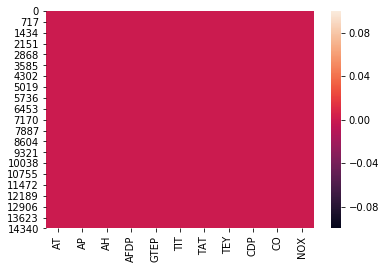

In [3]:
sns.heatmap(df.isnull())

In [4]:
X = df.drop('TEY',axis=1).values
y = df['TEY'].values

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X.shape

(15039, 10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [93]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [94]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
353/353 [==============================] - 0s 591us/step - loss: 14185.4502
Epoch 2/250
353/353 [==============================] - 0s 709us/step - loss: 1034.8761
Epoch 3/250
353/353 [==============================] - 0s 686us/step - loss: 27.2057
Epoch 4/250
353/353 [==============================] - 0s 683us/step - loss: 22.0730
Epoch 5/250
353/353 [==============================] - 0s 684us/step - loss: 18.8215
Epoch 6/250
353/353 [==============================] - 0s 756us/step - loss: 16.0464
Epoch 7/250
353/353 [==============================] - 0s 669us/step - loss: 13.8396
Epoch 8/250
353/353 [==============================] - 0s 640us/step - loss: 11.9723
Epoch 9/250
353/353 [==============================] - 0s 650us/step - loss: 10.2290
Epoch 10/250
353/353 [==============================] - 0s 662us/step - loss: 8.6714
Epoch 11/250
353/353 [==============================] - 0s 641us/step - loss: 7.3247
Epoch 12/250
353/353 [==============================] - 0s 6

353/353 [==============================] - 0s 696us/step - loss: 0.6941
Epoch 192/250
353/353 [==============================] - 0s 740us/step - loss: 0.6980
Epoch 193/250
353/353 [==============================] - 0s 593us/step - loss: 0.7118
Epoch 194/250
353/353 [==============================] - 0s 605us/step - loss: 0.7006
Epoch 195/250
353/353 [==============================] - 0s 626us/step - loss: 0.7076
Epoch 196/250
353/353 [==============================] - 0s 648us/step - loss: 0.6978
Epoch 197/250
353/353 [==============================] - 0s 682us/step - loss: 0.7056
Epoch 198/250
353/353 [==============================] - 0s 636us/step - loss: 0.6900
Epoch 199/250
353/353 [==============================] - 0s 633us/step - loss: 0.7070
Epoch 200/250
353/353 [==============================] - 0s 633us/step - loss: 0.6933
Epoch 201/250
353/353 [==============================] - 0s 655us/step - loss: 0.6793
Epoch 202/250
353/353 [==============================] - 0s 618us/st

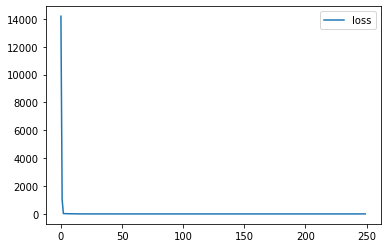

In [95]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [151]:
pred = model.predict(X_test)

In [152]:
pred = pred.ravel()

In [153]:
test_score = model.evaluate(X_test,y_test,verbose=0)
test_score

0.7355530858039856

In [154]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [166]:
mean_absolute_error(pred,y_test)

0.6749611974675604

In [167]:
mean_squared_error(pred,y_test)

0.7355524794000082

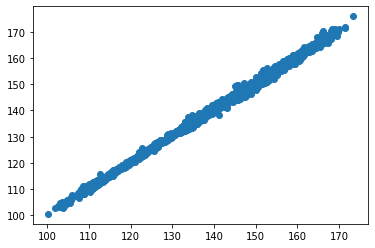

In [177]:
plt.scatter(y_test,pred)